In [28]:
import seaborn as sns
%matplotlib inline

In [29]:
tips = sns.load_dataset('tips')

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


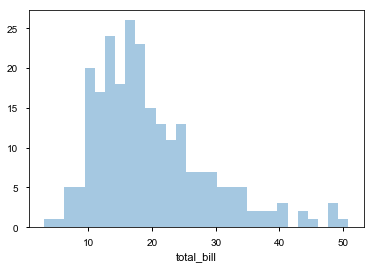

In [31]:
sns.distplot(tips['total_bill'],kde = False, bins = 30)
sns.set_style('darkgrid')
# KDE = False removes the Kernal Density Estimation line

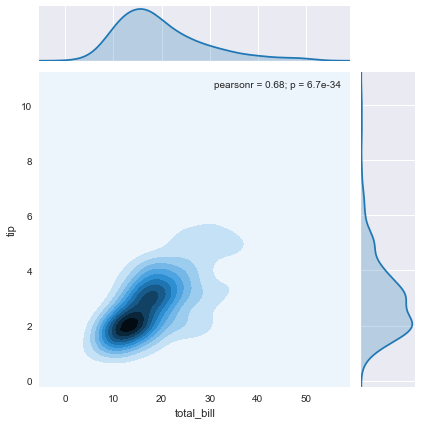

In [32]:
sns.set_style('darkgrid')
sns.jointplot(x='total_bill',y='tip',data=tips, kind ='kde')

# arguments for kind: - default is scatter
# kde - which is the dimensions for 
# hex - hexagon
# reg - linear regression

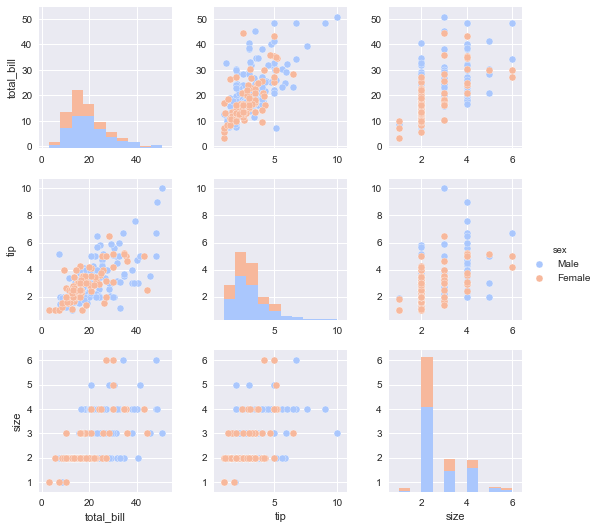

In [33]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')
# hue = is for NON CATEGORICAL Columns or columns with data that isn't numerical 

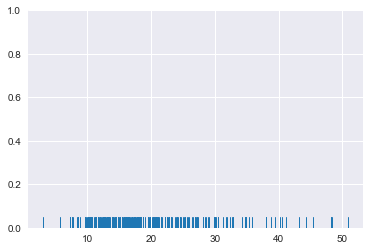

In [34]:
sns.rugplot(tips['total_bill'])

(0, 1)

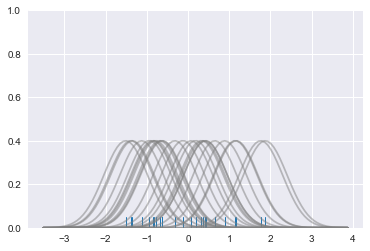

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#create dataset 
dataset = np.random.randn(25)

#create the rugplot
sns.rugplot(dataset);

# set up x-axis for plot
x_min = dataset.min() -2
x_max = dataset.max() +2

# 100 evenly spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)

# set up the bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# blank list for kernel
kernel_list = []

# plot each basis function
for data_point in dataset:
    
    #creates a kernel for each point and appends it to the list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)

plt.ylim(0,1)

# this code essentially plotts the rugplot with your dataset 
# and then for every point on your rugplot, you have created a normal distribution

In [36]:
# this is how you create the KDE function - which is the sum of all points on a rugplot.
# add up PDF of every curve and you have the KDE function

Text(0.5,0.98,'Sum of the Basis Functions')

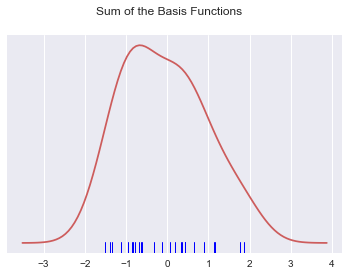

In [37]:
# plot the sum of all the basis function
sum_of_kde = np.sum(kernel_list, axis = 0)

# plot figure
fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

# add the initial rugplot
sns.rugplot(dataset, c = 'blue')

# remove tickmarks
plt.yticks([])

# set title
plt.suptitle('Sum of the Basis Functions')

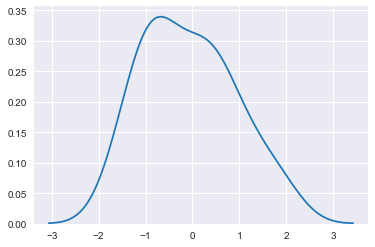

In [38]:
sns.kdeplot(dataset)
# Python function to create the above KDE plot

In [39]:
import numpy as np

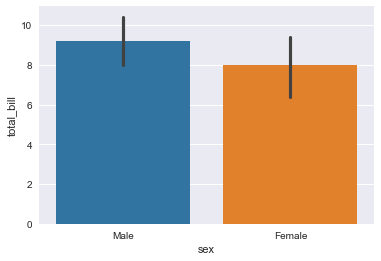

In [40]:
sns.barplot(data = tips, x='sex', y='total_bill', estimator = np.std)
# estimator default is mean, y values must be numeric

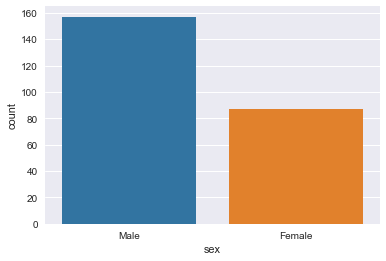

In [41]:
sns.countplot(x='sex',data = tips)
# univariate, only one category required for countplot 

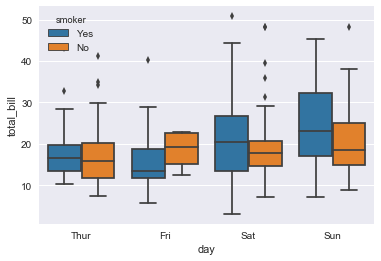

In [42]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')
# This shows your quartiles of your dataset
# hue adds another categorical value to  compare two categorical values
# this shows that on Fridays, your bill isn't as large if you are not a smoker compared to if you are smoker

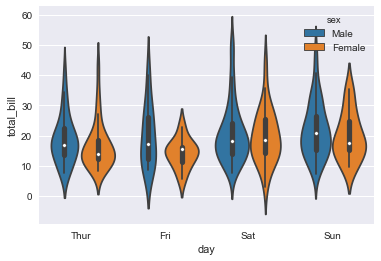

In [43]:
sns.violinplot(x = 'day',  y = 'total_bill', data = tips, hue = 'sex')

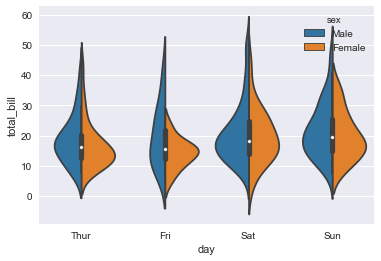

In [44]:
sns.violinplot(x = 'day',  y = 'total_bill', data = tips, hue = 'sex', split = True)
# ability to split violin plot so left and right side represent separate data

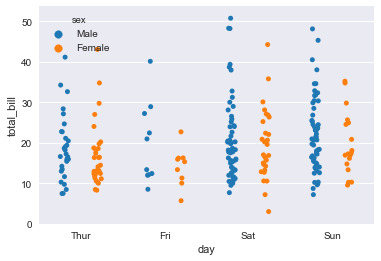

In [45]:
sns.stripplot(x = 'day', y ='total_bill',jitter = True ,data = tips, hue = 'sex', dodge = True)
# jitter = True spaces out data to help identify clusters easier
# dodge = Tue splits up hue into two seperate lines of data 

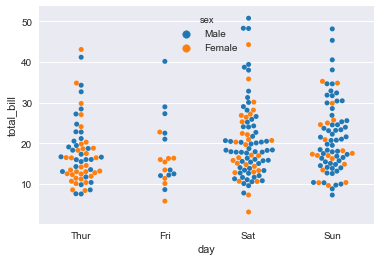

In [46]:
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex')

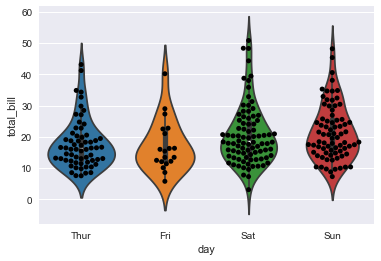

In [47]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot( x = 'day', y = 'total_bill', data = tips, color= 'black')
# seaborn has ability to combine two plots into one

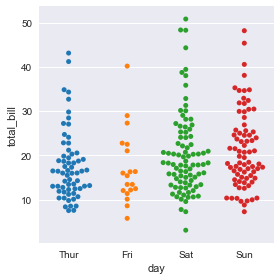

In [48]:
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm')
# plots from above can be called with  factor plot with kind indicated

In [49]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


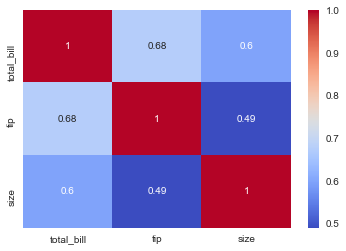

In [50]:
tc = tips.corr()
print(tc)
sns.heatmap(tc,annot= True, cmap = 'coolwarm')

In [51]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp
# creates pivot table indexed by months, columns year, with values within pivot table passengers

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


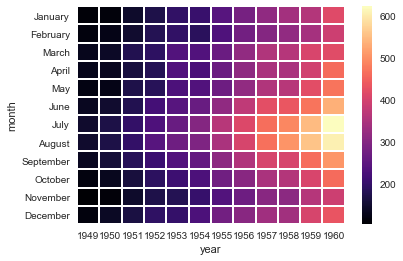

In [52]:
sns.heatmap(fp, cmap = 'magma', linecolor = 'white', linewidth = '1')
# as you can see from looking at this heatmap, there are more flights as time goes on
# technology advances, more people fly on airplanes
# also the busiest months are in July - the summer months

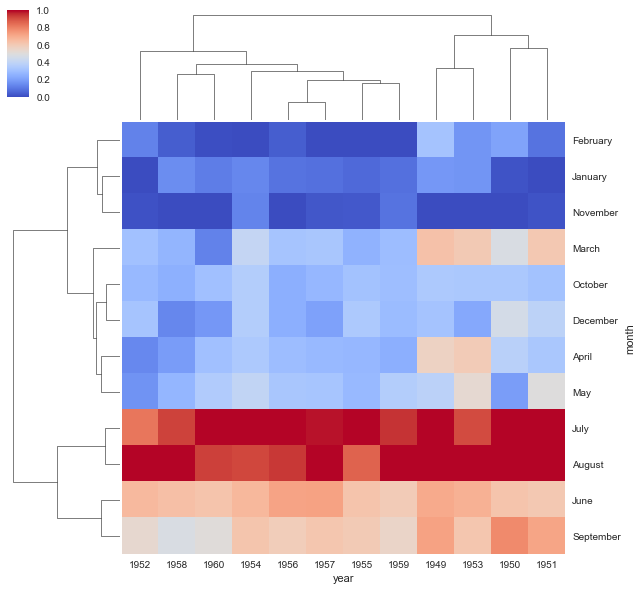

In [53]:
sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)
# This categorical map shows that shows colums and rows that are similar to one another
# for example here that 1959 and 1960 are similar to one another, as well as July and August

In [54]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

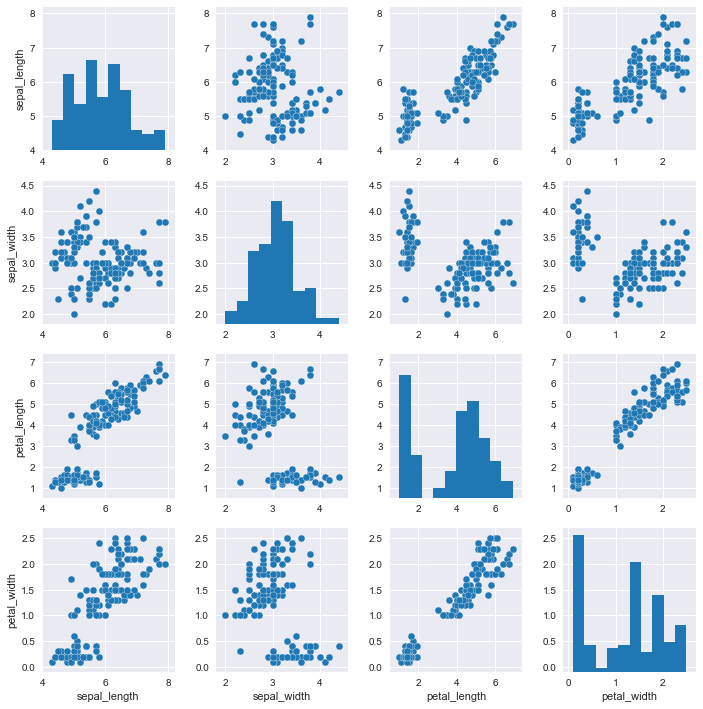

In [56]:
sns.pairplot(iris)

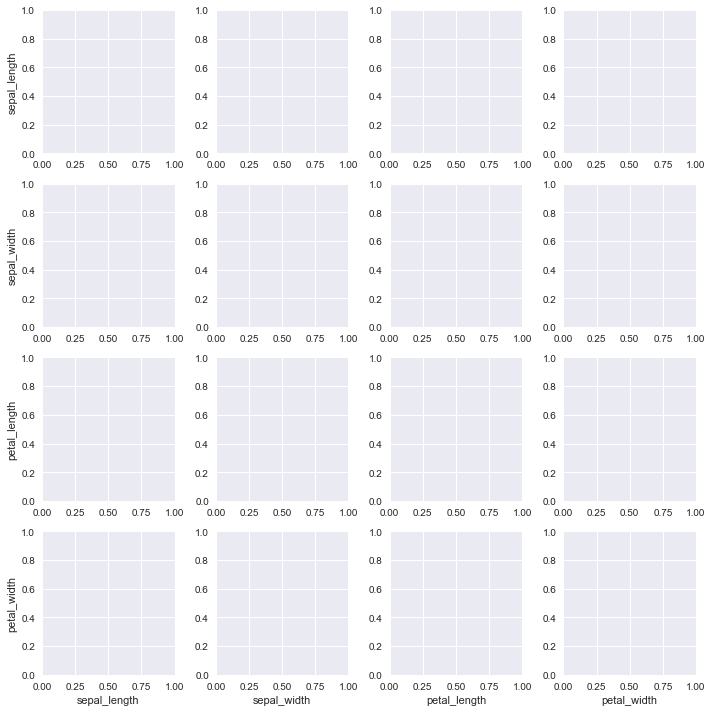

In [57]:
sns.PairGrid(iris)
# creates blank pairgrid that allows for customization

C:\Users\Bryan\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


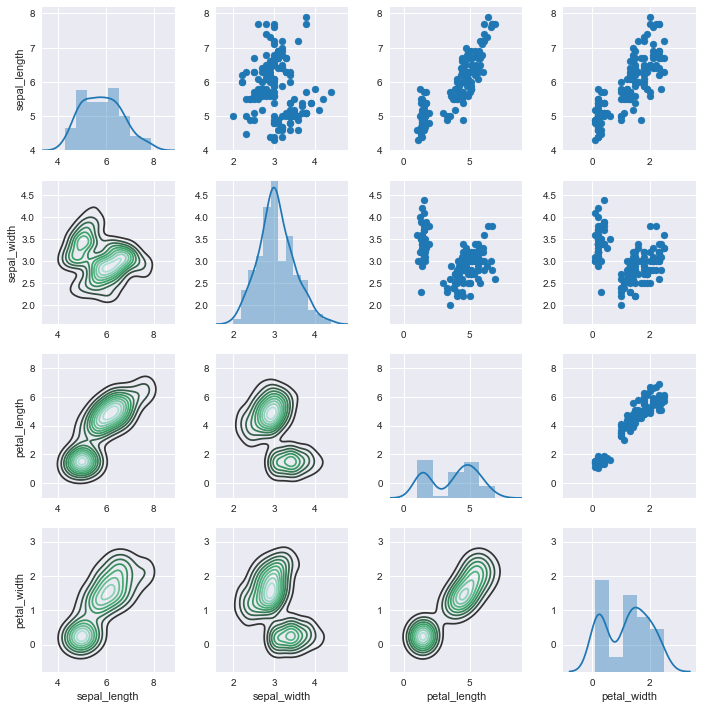

In [58]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)

# use map_uppper, map_diag, map_lower to customize which part of the pairplot you want to use

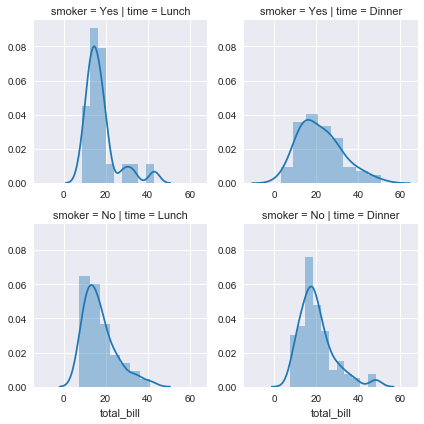

In [59]:
sns.FacetGrid(data = tips, col = 'time', row= 'smoker').map(sns.distplot, 'total_bill')
# plotting two categorical values on the rows and columns as arranged
# with the ability to change the plot type as required

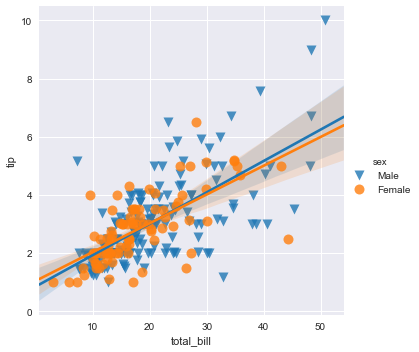

In [60]:
 sns.lmplot('total_bill','tip',tips, hue='sex', markers = ['v','o'], scatter_kws={'s':100})
# Returns is a scatterplot with a linear fit overtop of the points
# Hue on top of this so that the scatterplot can contain two sets of information

# for our particular chart - what this shows is that both male and female both have a similar linear fit
# for bill size vs tip amount

# the scatter_kws is to customize the size of the markers

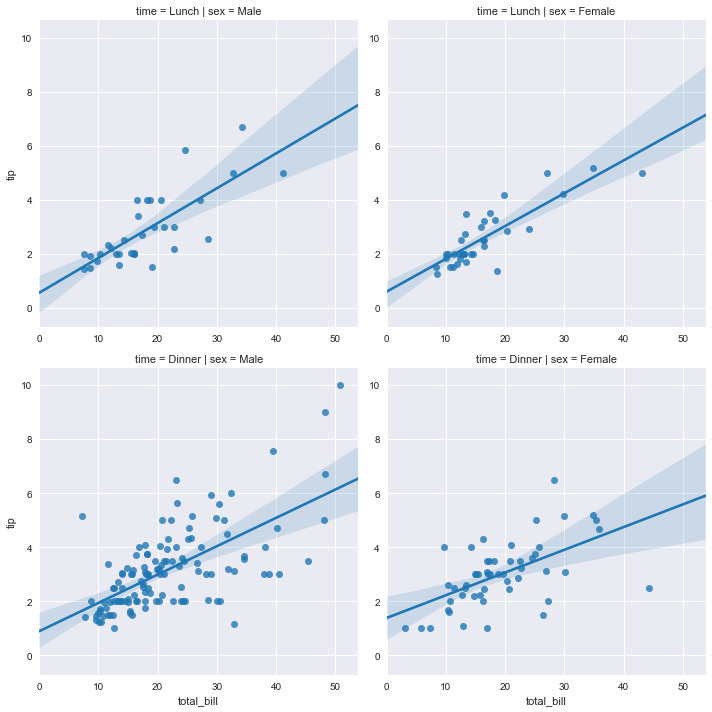

In [61]:
sns.lmplot('total_bill','tip',tips, col='sex', row ='time')
# ability to use lmplot to create a FacetGrid

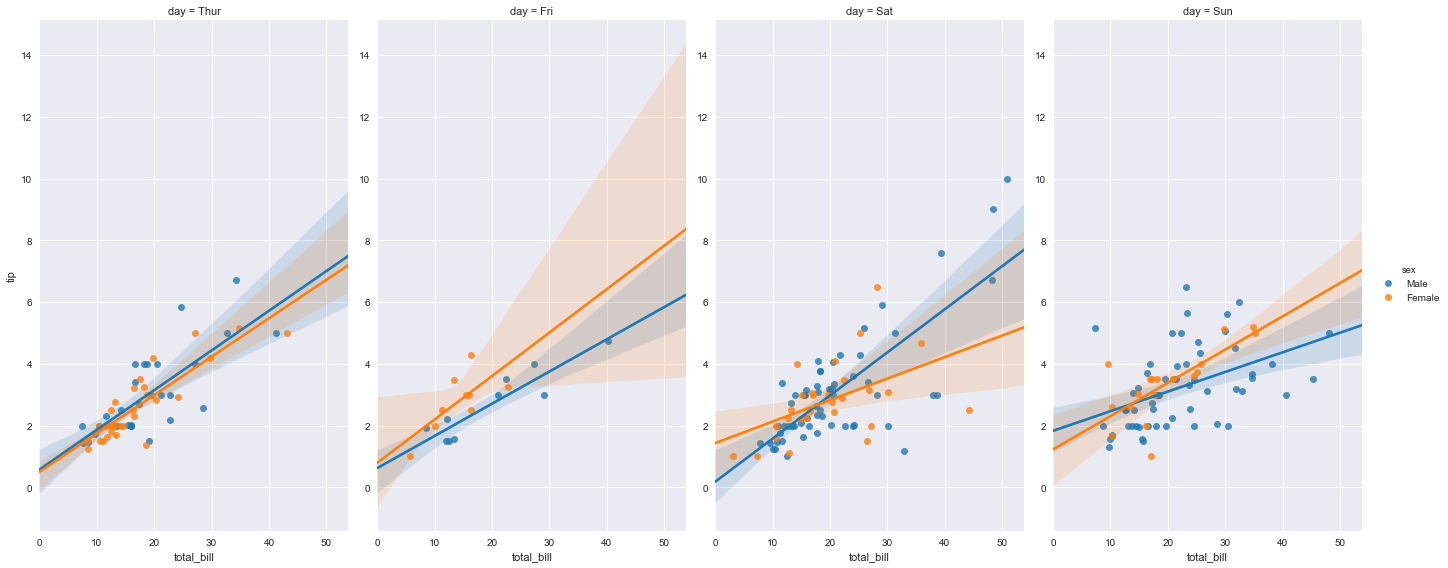

In [62]:
sns.lmplot('total_bill','tip',tips, col='day',hue = 'sex',size = 8, aspect = 0.6)

# aspect - that changes the ratio between the height and the width of the seperate grid
# size is size of each grid

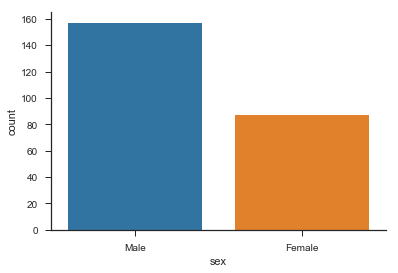

In [63]:
sns.set_style('ticks')
sns.countplot(x='sex',data= tips)
sns.despine()
# sns.set_style changes the style of the plot
# sns.despine() removes the left and upperspine of the grid

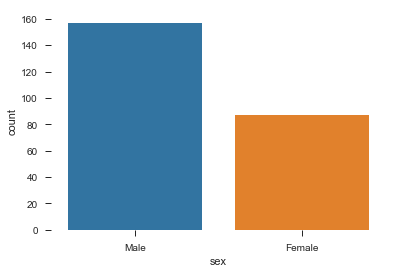

In [64]:
sns.set_style('ticks')
sns.countplot(x = 'sex', data = tips)
sns.despine(left=True, bottom=True)
# All the spines from a chart removed by filling in the left and bottom as True

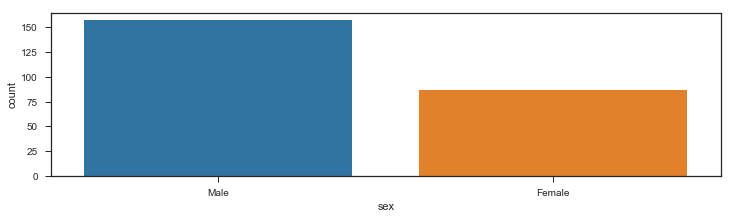

In [65]:
plt.figure(figsize = (12,3))
sns.countplot(x = 'sex', data = tips)
# same command as matplotlib to change figsize

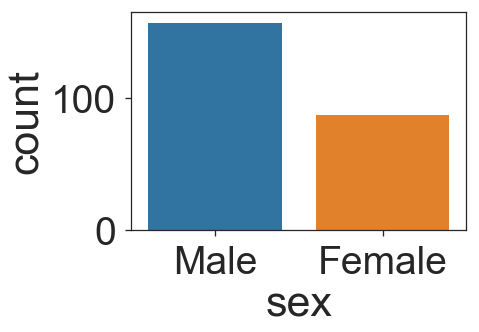

In [66]:
sns.set_context('talk',font_scale = 3)
sns.countplot(x = 'sex', data = tips)
# sns.set_context can change what the context of this plot is used for - paper, poster, talk, notebook
# font_scale is how many times we are multiplying the font to. in this case we are using 3 times the original

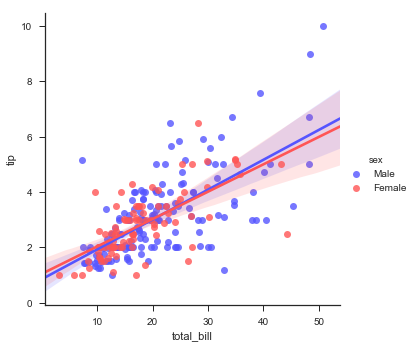

In [67]:
sns.set_context('notebook')
sns.lmplot('total_bill','tip',tips, hue ='sex', palette = 'seismic')

# for lmplot palette changes color palette of chart 